In [ ]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_train.csv'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supremekai40
Your Kaggle Key: ··········


100%|██████████| 790k/790k [00:00<00:00, 74.1MB/s]

In [ ]:
import pandas as pd

In [ ]:
dataset= pd.read_csv('/content/predicting-pulsar-starintermediate/pulsar_data_train.csv')
print(dataset)

        Mean of the integrated profile  ...  target_class
0                           121.156250  ...           0.0
1                            76.968750  ...           0.0
2                           130.585938  ...           0.0
3                           156.398438  ...           0.0
4                            84.804688  ...           0.0
...                                ...  ...           ...
12523                       124.312500  ...           0.0
12524                       115.617188  ...           0.0
12525                       116.031250  ...           0.0
12526                       135.664062  ...           0.0
12527                       120.726562  ...           0.0

[12528 rows x 9 columns]


Checking the columns or the features, I am going to work with. It is important to know these, because sometimes dataset has some parameters which might not be equally important for our work and we can work without that particular column, that can be known with more and more data visualisation. 

In [ ]:
dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see there are 8-9 columns and for pulsars they look pretty important. I will decide the importance of the features in feature selection.

In [ ]:
dataset.head(9)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0


I get one important insight from the above table, that is there are some values which are NAN, empty or infinite but they will be treated as outliers only.

Checking the data to gain more intuitive insights, which is always a good practice.

In [ ]:
dataset.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


As I could earlier see NAN values, thus going for the important statistical parameters using the describle function. I can see that although total elements are 12528 but some columns have entries less than that, that is there are empty pockets.

It will be more clear if we try to form these data distribution. As I can see the describe function gives me parameters for integrated profile as well as DM-SNR curve. 

Physically speaking, one major parameter for Pulsars are indeed Dispersion Measure and how it behaves with Signal-to-Noise Ratio. 

In [ ]:
dataset.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

Thus I can now be sure of one thing, all are integer or numeric type features, there is nothing here which are textual or need to be taken care of. 

## Visualisation of data 

I will be using seaborn and matplotlib to make some visual insights for the data. I will import them here for now.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

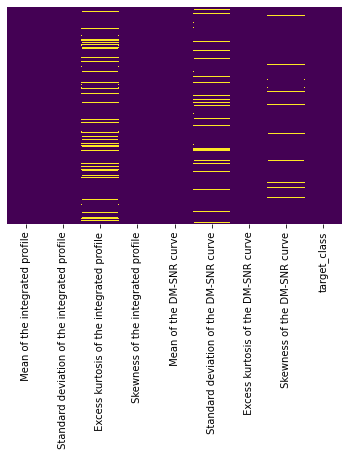

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As suspected the three columns are indeed showing a lot of empty values

Trying to find where these empty values are: 

In [ ]:
dataset.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [ ]:
dataset['target_class'].tail(10)

12518    0.0
12519    0.0
12520    0.0
12521    1.0
12522    0.0
12523    0.0
12524    0.0
12525    0.0
12526    0.0
12527    0.0
Name: target_class, dtype: float64

To check how many positive candidates are there which will be actually helpful in training my model to detect pulsars.

In [ ]:
count= len(dataset[dataset['target_class']==1])
print("Number of positive candidates: {}".format(count))
print("Number of negative candidates: {}".format(len(dataset)-count))

Number of positive candidates: 1153
Number of negative candidates: 11375


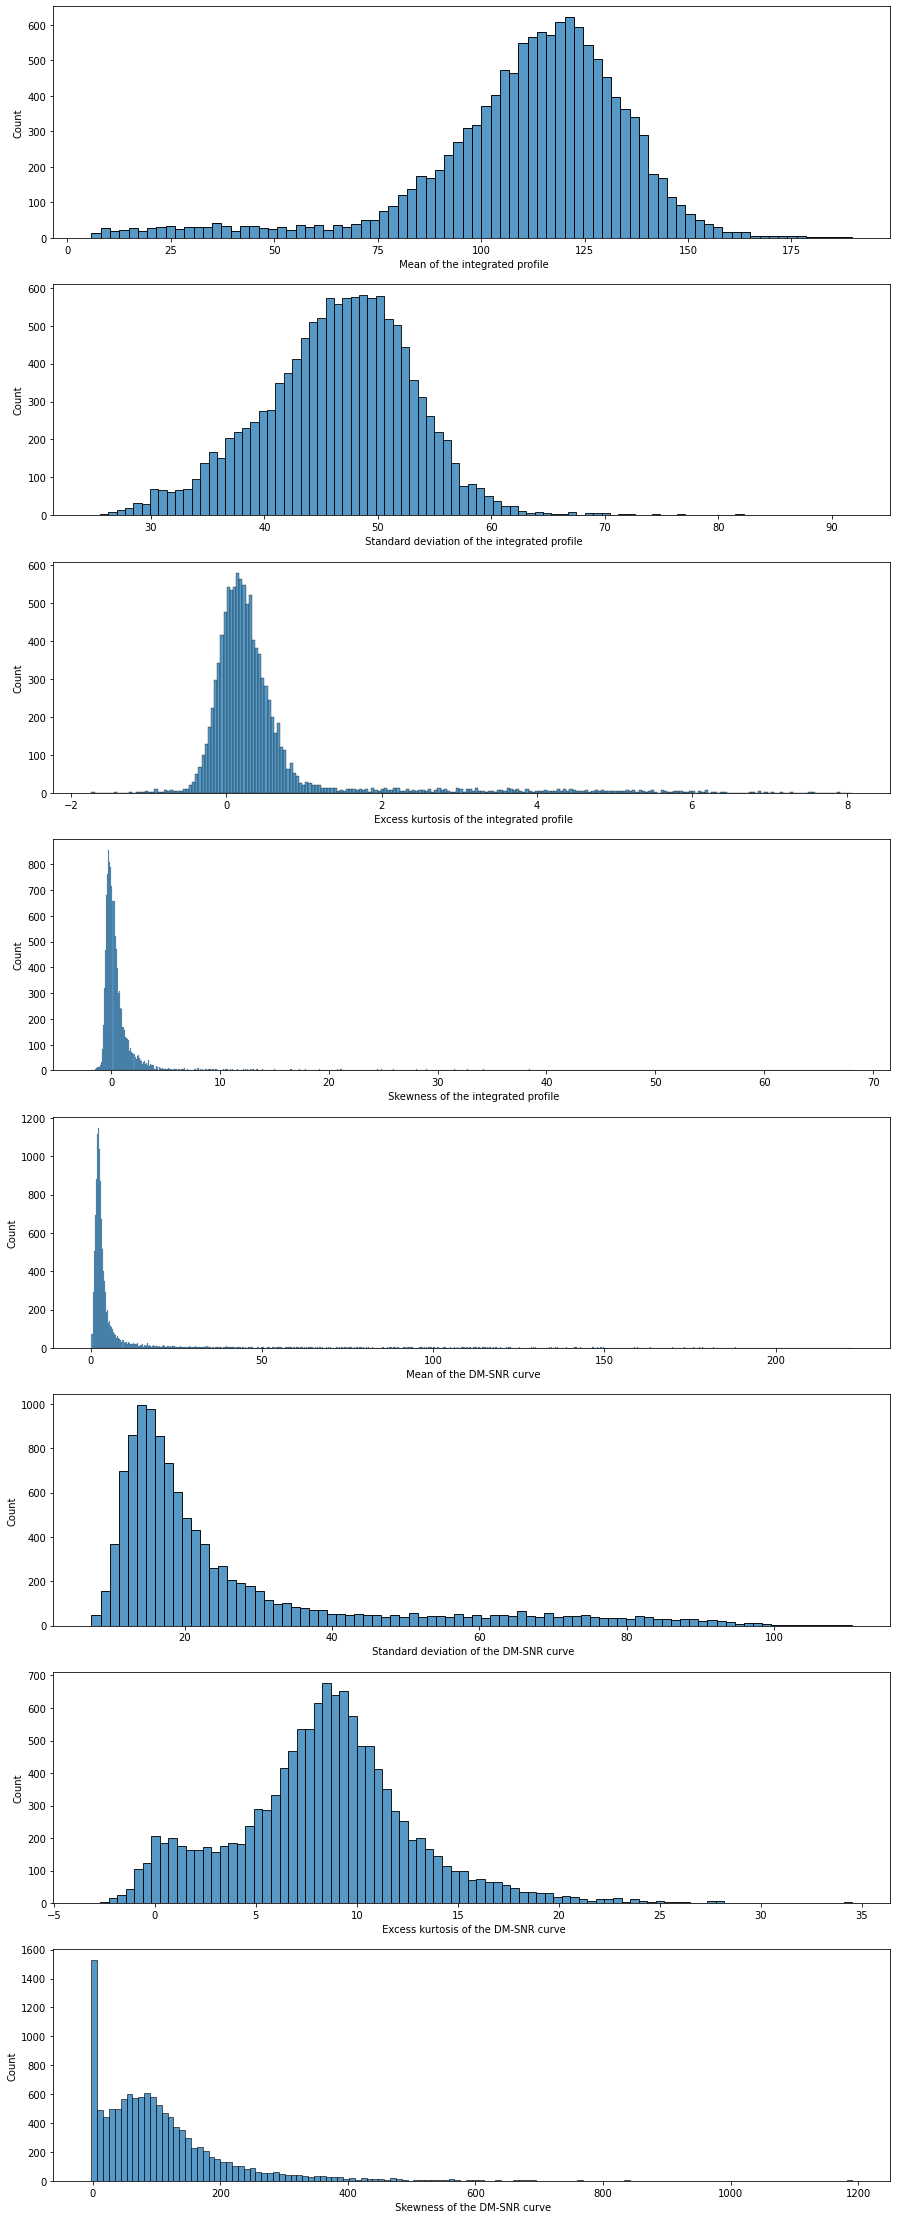

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
dataset.columns[:-1].size
fig, axes = plt.subplots(nrows=len(dataset.columns[:-1]),ncols=1,  figsize=(15, 40))
for i in range(len(dataset.columns[:-1])):
    feature = dataset.columns[i]
    plt.figure(figsize = (5, 5))
    data=dataset.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i])

There indeed is some need of data normalisation as although almost all data is normalised functions but still we cannot afford to have a biased data.

Target Class based plotting can give us more help to know what are the trends for pulsars and what are the trends for other objects in the dataset.

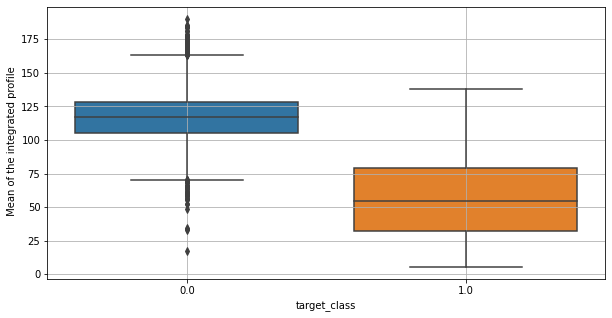

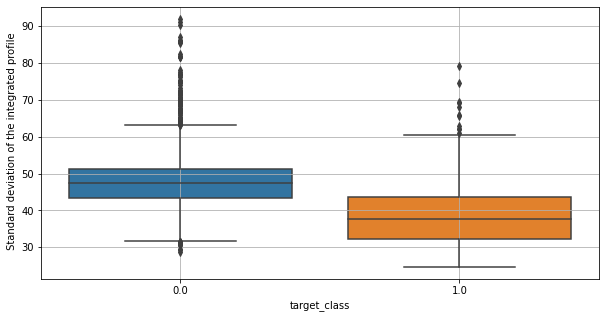

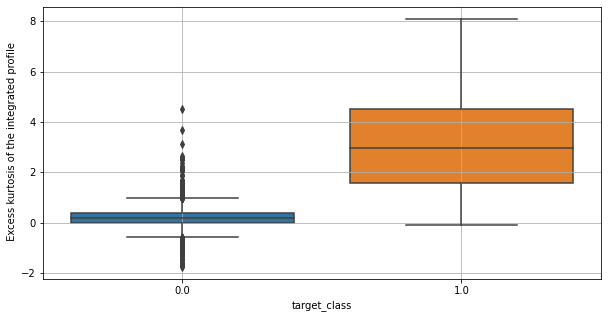

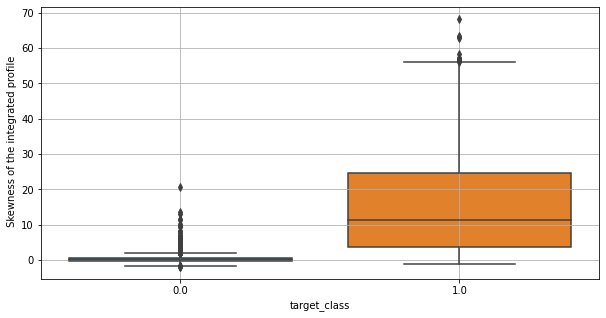

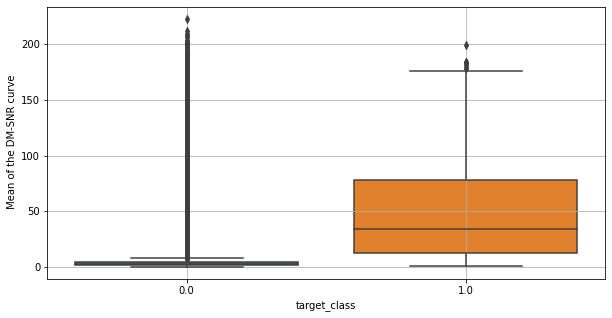

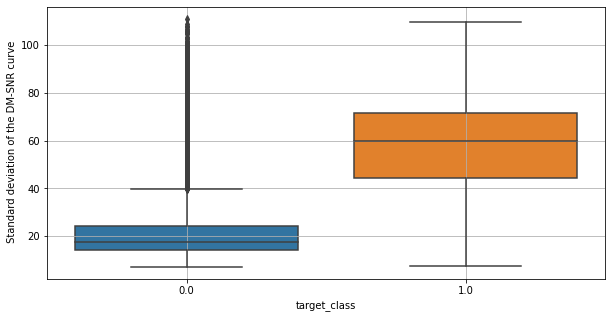

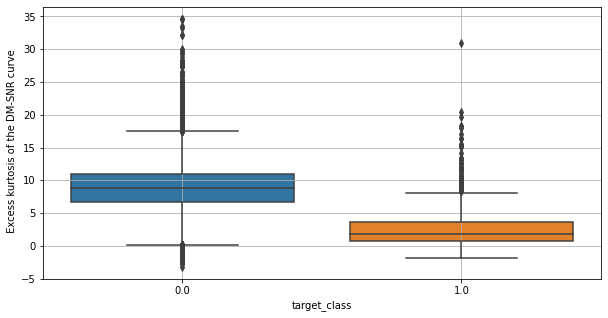

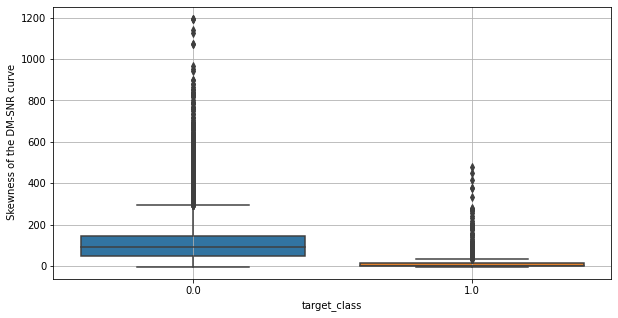

In [ ]:
data_copy= dataset.copy()
for features in dataset.columns[:-1]:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = 'target_class', y = features, data = data_copy)
    plt.grid()
    plt.show()

Now some data was missing, I can go in two ways, either to just ignore those data points completely, or to somehow predict those missing values to a very good accuracy and then consider that filled dataset for model.

I will go for the second choice as you can already see, there are very less positive pulsars to train the model for true results, we cannot afford to discard any of those data. 

Perhaps if we know how much the 3 columns with missing values are related with the other parameters, we can choose to ignore that input feature in the model. 

For now I will try to fill in the values and consider complete data or I will try to ignore some features, its upto my experimentation.

In [ ]:
dataset.isnull().sum()
len(dataset)
dataset.isnull().sum()/len(dataset) * 100

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.848978
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.402937
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.988825
target_class                                      0.000000
dtype: float64

Excess curtosis has 13% of the values as null and Std. Deviation of DM-SNR curve is also pretty close to 10%

Lets try to form a dataset with null value data points only to be computed by machine.


In [ ]:
null_dataset= dataset[dataset.isnull().any(axis=1)]
null_dataset

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0
13,128.734375,48.695560,NaN,0.307803,5.307692,25.162295,5.497544,32.739833,0.0
...,...,...,...,...,...,...,...,...,...
12503,132.335938,52.273362,-0.095982,-0.417207,4.736622,NaN,6.188823,38.899944,0.0
12504,85.015625,36.717244,NaN,2.503142,3.262542,21.981437,7.249661,54.863037,0.0
12506,113.750000,51.916098,0.215305,-0.216608,1.678930,11.105255,13.117945,NaN,0.0
12513,127.609375,53.509379,NaN,-0.564330,0.527592,8.985407,22.332707,571.169156,0.0


In [ ]:
length=len(null_dataset)
length2=len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull()])
length3=len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Skewness of the DM-SNR curve'].isnull()])
length4= len(null_dataset[null_dataset[' Skewness of the DM-SNR curve'].isnull() &  
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull()])
length5= len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull() & 
      null_dataset[' Skewness of the DM-SNR curve'].isnull()])
print(length)
print(length2)
print(length3)
print(length4)
print(length5)

3255
140
91
57
5


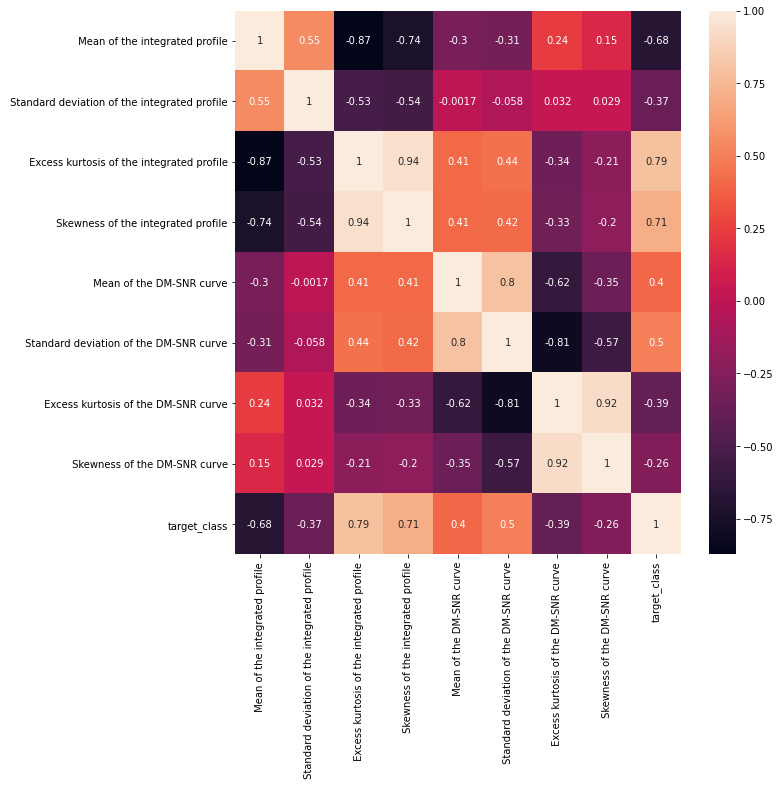

In [ ]:
%matplotlib inline
plt.figure(figsize = (10, 10))
corr_mat = dataset.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

I will Drop some columns based on the outliers in them, their correlation with other features as well as how much of empty values were there.

In [ ]:
dataset_drop= dataset.copy()
dataset_drop=dataset_drop.dropna(axis=1)
dataset_drop.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', 'target_class'],
      dtype='object')

In [ ]:
dataset_drop.head(15)

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class
0,121.156250,48.372971,-0.013165,3.168896,7.449874,0.0
1,76.968750,36.175557,3.388719,2.399666,9.414652,0.0
2,130.585938,53.229534,-0.297242,2.743311,8.508364,0.0
3,156.398438,48.865942,-0.171294,17.471572,2.958066,0.0
4,84.804688,36.117659,3.274125,2.790134,8.405008,0.0
5,121.007812,47.176944,0.091336,2.036789,9.546051,0.0
6,79.343750,42.402174,2.244377,141.641304,-0.700809,0.0
7,109.406250,55.912521,0.056247,2.797659,9.443282,0.0
8,95.007812,40.219805,1.153164,2.770067,7.851205,0.0
9,109.156250,47.002234,0.190296,4.578595,5.702532,0.0


##DataLoader and Pytorch-ready data

In [ ]:
input_cols= [title for title in dataset_drop.columns[:-1]]
output_cols= [dataset_drop.columns[-1]]
input_cols, output_cols

([' Mean of the integrated profile',
  ' Standard deviation of the integrated profile',
  ' Skewness of the integrated profile',
  ' Mean of the DM-SNR curve',
  ' Excess kurtosis of the DM-SNR curve'],
 ['target_class'])

In [ ]:
inputs_array = dataset_drop[input_cols].to_numpy()
targets_array = dataset_drop[output_cols].to_numpy()
inputs_array, targets_array

(array([[ 1.21156250e+02,  4.83729711e+01, -1.31654890e-02,
          3.16889632e+00,  7.44987415e+00],
        [ 7.69687500e+01,  3.61755566e+01,  3.38871856e+00,
          2.39966555e+00,  9.41465226e+00],
        [ 1.30585938e+02,  5.32295335e+01, -2.97241641e-01,
          2.74331104e+00,  8.50836378e+00],
        ...,
        [ 1.16031250e+02,  4.32138464e+01,  4.33087971e-01,
          7.85117057e-01,  1.70552145e+01],
        [ 1.35664062e+02,  4.99337494e+01, -2.26726179e-01,
          3.85953177e+00,  7.39839490e+00],
        [ 1.20726562e+02,  5.04722564e+01,  1.84797225e-01,
          7.69230769e-01,  1.76622219e+01]]), array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [ ]:
targets_array.shape

(12528, 1)

In [ ]:
dataset_drop[input_cols].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,1.778431,12.674758,8.333489
std,25.672828,6.801077,6.208450,29.613230,4.535783
min,5.812500,24.772042,-1.791886,0.213211,-3.139270
25%,100.871094,42.362222,-0.188142,1.910535,5.803063
50%,115.183594,46.931022,0.203317,2.792642,8.451097
75%,127.109375,50.979103,0.932374,5.413253,10.727927
max,189.734375,91.808628,68.101622,222.421405,34.539844


In [ ]:
import torch

In [ ]:
inputs= torch.tensor(inputs_array, dtype=torch.float32)
targets= torch.tensor(targets_array, dtype=torch.float32)

In [ ]:
targets.shape

torch.Size([12528, 1])

In [ ]:
from torch.utils.data import DataLoader,TensorDataset,random_split

In [ ]:
data=TensorDataset(inputs, targets)

Separating some part of train data for validation. As there are not a lot of Pulsar Candidates, handling data carefully becomes very important.

In [ ]:
val_percent=0.11
num_rows= len(dataset_drop)
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds= random_split(data,[train_size, val_size])

In [ ]:
len(train_ds), len(val_ds)

(11150, 1378)

In [ ]:
batch_size=128

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb.size())
    print("outputs:", yb.size())
    break

inputs: torch.Size([128, 5])
outputs: torch.Size([128, 1])


In [ ]:
input_size= len(input_cols)
output_size= len(output_cols)
input_size,output_size

(5, 1)

##Outlier Treatment

In [ ]:
dataset_drop.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,1.778431,12.674758,8.333489,0.092034
std,25.672828,6.801077,6.208450,29.613230,4.535783,0.289085
min,5.812500,24.772042,-1.791886,0.213211,-3.139270,0.000000
25%,100.871094,42.362222,-0.188142,1.910535,5.803063,0.000000
50%,115.183594,46.931022,0.203317,2.792642,8.451097,0.000000
75%,127.109375,50.979103,0.932374,5.413253,10.727927,0.000000
max,189.734375,91.808628,68.101622,222.421405,34.539844,1.000000


In [ ]:
Q1 = dataset_drop.quantile(0.25)
Q3 = dataset_drop.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((dataset_drop < (lower_range)) | (dataset_drop > (upper_range))).sum()/len(dataset_drop) * 100

Number of Outliers (Percentage):


 Mean of the integrated profile                   5.723180
 Standard deviation of the integrated profile     1.420817
 Skewness of the integrated profile              10.696041
 Mean of the DM-SNR curve                        16.339400
 Excess kurtosis of the DM-SNR curve              2.785760
target_class                                      9.203384
dtype: float64

As we can see Mean of DM-SNR curve has a lot of Outliers, which should be taken care of.

In [ ]:
for cols in dataset_drop.columns[:-1]:
  dataset_drop[cols] = np.where(dataset_drop[cols]>upper_range[cols],
                                    upper_range[cols],dataset_drop[cols])
  dataset_drop[cols] = np.where(dataset_drop[cols]<lower_range[cols],
                                    lower_range[cols],dataset_drop[cols])
dataset_drop.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,112.447886,46.475793,0.520109,4.223304,8.248613,0.092034
std,21.510603,6.572628,0.983681,3.312592,4.276166,0.289085
min,61.513672,29.436902,-1.791886,0.213211,-1.584232,0.000000
25%,100.871094,42.362222,-0.188142,1.910535,5.803063,0.000000
50%,115.183594,46.931022,0.203317,2.792642,8.451097,0.000000
75%,127.109375,50.979103,0.932374,5.413253,10.727927,0.000000
max,166.466797,63.904423,2.613147,10.667329,18.115223,1.000000


(-200.0, 1300.0)

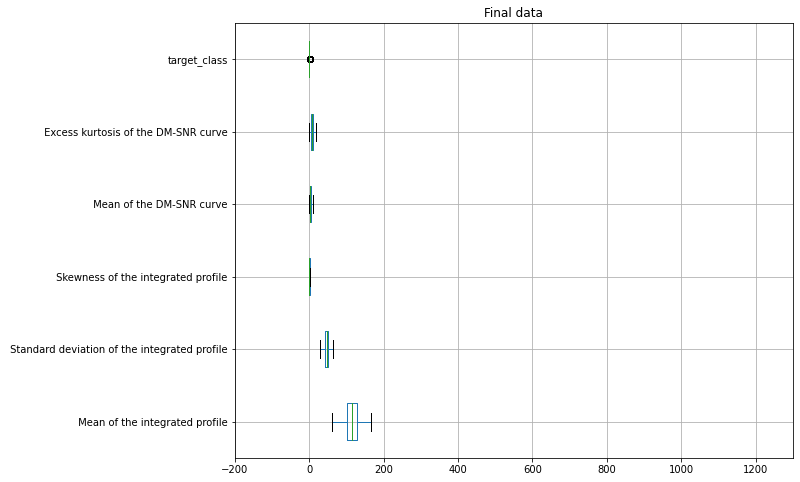

In [ ]:
cols = list(dataset_drop.columns)
plt.figure(figsize=(10,8))
plt.title('Final data')
dataset_drop.boxplot(vert=0, column=cols)
plt.xlim(-200, 1300)

In [ ]:
inputs.shape, targets.shape

(torch.Size([12528, 5]), torch.Size([12528, 1]))

In [ ]:
import torch

In [ ]:
def accuracy(outputs, targets):
    pred_rounded = outputs[1].round()
    return torch.tensor(pred_rounded.eq(targets).sum() / len(targets))


In [ ]:
len(dataset_drop)

12528

In [ ]:
class PulsarLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size,output_size)
        #self.activation= nn.ReLU()
        #self.linear2= nn.Linear(3, output_size)
        self.norm= nn.Sigmoid()

        
    def forward(self,xb):
        out= self.linear(xb)
        #out=self.activation(out)
        #out=self.linear2(out)
        out=self.norm(out)
        return out

    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = nn.BCELoss()                         # fill this
        loss_t= loss(out,targets)
        return loss_t
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = nn.BCELoss()
        loss_v= loss(out,targets)
        acc = accuracy(out, targets)        # Calculate accuracy
        return {'val_loss': loss_v, 'val_acc': acc} # fill this    
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        #if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.6f}".format(epoch+1, result['val_loss'], result['val_acc']))


In [ ]:
model = PulsarLogisticRegression()
model.linear

Linear(in_features=5, out_features=1, bias=True)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1925, -0.1576, -0.1341,  0.0035, -0.3492]], requires_grad=True),
 Parameter containing:
 tensor([0.3097], requires_grad=True)]

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr, momentum=0.9)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [ ]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 18.834726333618164, 'val_acc': 0.1050991341471672}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
history1= fit(10,0.001,model,train_loader,val_loader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [1], val_loss: 4.2133, val_acc: 0.828139
Epoch [2], val_loss: 2.7779, val_acc: 0.828139
Epoch [3], val_loss: 0.1370, val_acc: 0.819617
Epoch [4], val_loss: 0.1187, val_acc: 0.819617
Epoch [5], val_loss: 0.1247, val_acc: 0.819617
Epoch [6], val_loss: 0.1191, val_acc: 0.819617
Epoch [7], val_loss: 0.1137, val_acc: 0.819617
Epoch [8], val_loss: 0.1128, val_acc: 0.819617
Epoch [9], val_loss: 0.1127, val_acc: 0.819617
Epoch [10], val_loss: 0.1111, val_acc: 0.819617


In [ ]:
history1 += fit(40,0.001,model,train_loader,val_loader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [1], val_loss: 0.1106, val_acc: 0.819617
Epoch [2], val_loss: 0.1129, val_acc: 0.819617
Epoch [3], val_loss: 0.1120, val_acc: 0.819617
Epoch [4], val_loss: 0.1099, val_acc: 0.819617
Epoch [5], val_loss: 0.1221, val_acc: 0.819617
Epoch [6], val_loss: 0.1520, val_acc: 0.819617
Epoch [7], val_loss: 0.1237, val_acc: 0.819617
Epoch [8], val_loss: 0.1314, val_acc: 0.819617
Epoch [9], val_loss: 0.1167, val_acc: 0.819617
Epoch [10], val_loss: 0.1726, val_acc: 0.894901
Epoch [11], val_loss: 0.1408, val_acc: 0.819617
Epoch [12], val_loss: 0.1254, val_acc: 0.819617
Epoch [13], val_loss: 0.1093, val_acc: 0.819617
Epoch [14], val_loss: 0.1092, val_acc: 0.819617
Epoch [15], val_loss: 0.1101, val_acc: 0.819617
Epoch [16], val_loss: 0.1101, val_acc: 0.819617
Epoch [17], val_loss: 0.1112, val_acc: 0.819617
Epoch [18], val_loss: 0.1165, val_acc: 0.819617
Epoch [19], val_loss: 0.1379, val_acc: 0.819617
Epoch [20], val_loss: 0.1097, val_acc: 0.819617
Epoch [21], val_loss: 0.1093, val_acc: 0.819617
E

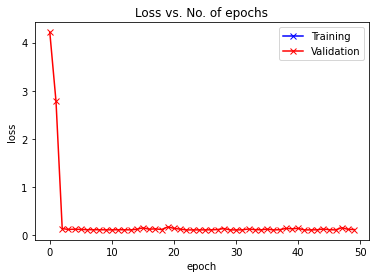

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history1)

In [ ]:
test_datasetURL="https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_test.csv"
od.download(test_datasetURL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supremekai40
Your Kaggle Key: ··········


100%|██████████| 790k/790k [00:00<00:00, 86.6MB/s]

In [ ]:
import torchvision.transforms as transforms

In [ ]:
test_dataset= pd.read_csv('/content/predicting-pulsar-starintermediate/pulsar_data_test.csv')

In [ ]:
test_dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
test_dataset_drop= test_dataset.copy()
test_dataset_drop=test_dataset_drop.drop([' Excess kurtosis of the integrated profile', 
                                     ' Skewness of the DM-SNR curve', 
                                     ' Standard deviation of the DM-SNR curve'], axis=1)
test_dataset_drop.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', 'target_class'],
      dtype='object')

In [ ]:
test_dataset_drop

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class
0,116.906250,48.920605,-0.129815,3.037625,8.122621,NaN
1,75.585938,34.386254,8.652913,3.765050,7.048189,NaN
2,103.273438,46.996628,0.821088,2.244983,9.330498,NaN
3,101.078125,48.587487,1.151870,81.887960,0.485105,NaN
4,113.226562,48.608804,0.292120,6.291806,4.540138,NaN
...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.184189,4.510870,6.634989,NaN
5366,114.976562,53.783052,-0.155708,2.772575,8.440796,NaN
5367,136.171875,48.924385,0.063227,2.810201,7.848577,NaN
5368,106.500000,49.066122,0.140377,2.331104,9.008041,NaN


In [ ]:
input_cols= [title for title in dataset_drop.columns[:-1]]
output_cols= [dataset_drop.columns[-1]]

In [ ]:
test_inputs_array = test_dataset_drop[input_cols].to_numpy()
test_targets_array = test_dataset_drop[output_cols].to_numpy()

NameError: ignored

In [ ]:
test_inputs= torch.tensor(test_inputs_array, dtype=torch.float32)
test_targets= torch.tensor(test_targets_array, dtype=torch.float32)

In [ ]:
test_inputs.size(), test_targets.size()

(torch.Size([5370, 5]), torch.Size([5370, 1]))

In [ ]:
test_data=TensorDataset(test_inputs, test_targets)
test_loader = DataLoader(test_data, 256)

In [ ]:
test_inputs_array, test_targets_array

(array([[ 1.16906250e+02,  4.89206049e+01, -1.29815137e-01,
          3.03762542e+00,  8.12262079e+00],
        [ 7.55859375e+01,  3.43862544e+01,  8.65291298e+00,
          3.76505017e+00,  7.04818863e+00],
        [ 1.03273438e+02,  4.69966280e+01,  8.21088334e-01,
          2.24498328e+00,  9.33049846e+00],
        ...,
        [ 1.36171875e+02,  4.89243851e+01,  6.32272070e-02,
          2.81020067e+00,  7.84857654e+00],
        [ 1.06500000e+02,  4.90661225e+01,  1.40377159e-01,
          2.33110368e+00,  9.00804066e+00],
        [ 1.10679688e+02,  3.82526416e+01,  1.69068874e+00,
          4.43478261e+00,  5.93974728e+00]]), array([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]))

In [ ]:
for xb,yb in test_loader:
    print("inputs:", xb.size())
    print("outputs:", yb.size())
    break

inputs: torch.Size([256, 5])
outputs: torch.Size([256, 1])


In [ ]:
def predict(test_loader, model):
    yhat = model(test_loader)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [ ]:
#result = predict(test_loader,model)
result2 = evaluate(model, val_loader) # Use the the evaluate function
print(result2)

{'val_loss': 0.11662352830171585, 'val_acc': 0.8196167349815369}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
